# Practice for ML
1. Decision Tree - Simple implementation with plot tree
2. Naive Bayes - if all numeric features, use Gaussian, else use CountVect with Multi or BernoulliNB.
3. GMM - GMM(n_components = 4). And plot the distribution the scatter using it, KMeans and normal
4. Bagging - DT, RFC, Bagging Classifier & conclusion
5. Boosting - AdaBoost and try Gradient Boost with different params learning rate with max depth =2.
```
gb.score(xtrain, ytrain), gb.evaluate(xtest, ytest)
#Then create the best model.
```

6. Stacking
```
make_regression
def get_stacking()
def get_models()
def evaluate(model, x, y):
  cv = RepeatedKFold(n_repeats = 3, n_splits = 10)
  scores = cross_val_score(model, x, y, scoring = 'neg_mean_absolute_error', cv = cv)
  return scores
```

7. Gen & Disc
```
def plot_db(model, x, y, ax, title, acc):
#Create xx,yy using xmin, ',',', and meshgrid
#Get z usnig predict_proba(np.c_[ravel()])[:1].reshape(xx.shape)
#Get Contour using ax.contourf(xx,yy,z, cmap =plt.cm.coolwarm)
#Get boundary using
boundary = model.predict()[:1]
ax.contour(xx,yy,boundary, colors = 'k')

#Get the scatter plot of x[:,0] and x[:, 1]
set title
```

8. Genetic Algo
```
#A.
x = [1,2,3,4,5], desired_output = 44
def fitness_func(ga_instance, solution, solution_idx):
  op = np.sum(x*solution)
  return 1.0/(op-desired_output)

pygad.GA(
  fitness_func,
  num_generations,
  sol_per_pop = 8,
  mutation_type,
  mutation_percent_gene,
  crossover_type = 'single_point',
  parent_selection_type,
  num_parents_mating,
  init_high, init_low,
  num_genes = len(x),
  keep_parents,
  gene_space = [{'low':0.1, 'high':0.2},{},{},]


)
```

9. Content based RS
* Get data and filter for features and fill na
* combine features
* Convert combined to tfidf with tfidf.toarray()
* cosine_similarity(text)
* Get user entered title, get index of that and sm = list(enumerate(cm[index]))
* sort sm by the 2nd value
* Use a for loop and get all the movies in a range, with their title and similarity score

10. Collab filtering based RS
* Get both datasets and merge based on a common column
* Take frac of the data
* apply pivot_table with columns, id, values and apply fillna(0) on it.
* Create a NearestNeighbors(n_neighbors = 10, algorithm ="brute", metric = "cosine")
* Get some recommeded indices using nn.kneighbors(pivot.loc[["Some Title"]], 10, return_distances = False)
* Then just print the recommendations.


### Prac 1 - Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

In [ ]:
data = load_iris()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df['class'] = data.target

In [ ]:
df['class'].unique()

array([0, 1, 2])

[Text(0.5357142857142857, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [39, 43, 38]'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.6071428571428571, 0.75, 'x[3] <= 1.75\ngini = 0.498\nsamples = 81\nvalue = [0, 43, 38]'),
 Text(0.5714285714285714, 0.8333333333333333, '  False'),
 Text(0.35714285714285715, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.14285714285714285, 0.25, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.5, 0.41666

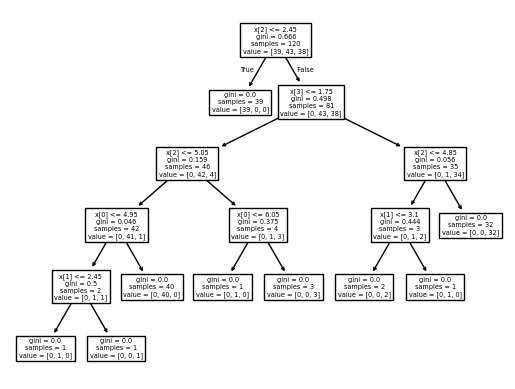

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20, random_state = 47)

dt= DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

plot_tree(dt)

In [ ]:
f1_score(ypred, ytest, average = "weighted")

0.966280193236715

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].dropna()
data['Sex'] = data['Sex'].map({"male":0, "female":1})
data['Embarked'] = data['Embarked'].map({"S":3, "C":2,"Q":1})
data.Embarked.unique()

array([3, 2, 1])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = data["Survived"]
scaler = MinMaxScaler()
x =  scaler.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.20, random_state = 47)
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
print(f1_score(ytest, ypred, average = "weighted"))

0.7510018071815824


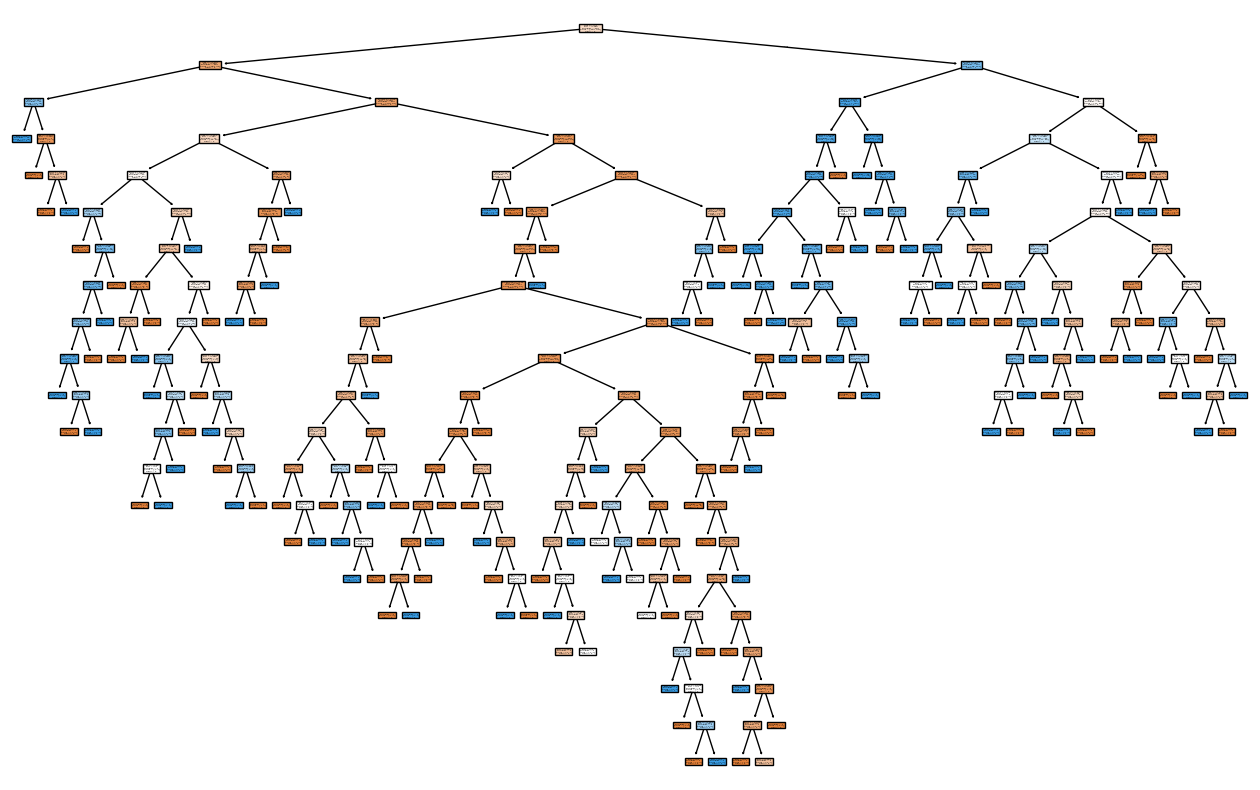

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =[16,10])
features = data.iloc[:, :-1].columns
classes = [str(i) for i in y.unique()]
plot_tree(dt, feature_names = features, class_names = classes, filled = True)
plt.show()

### Prac 2 - Naive Bayes

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

ds = load_breast_cancer()
x = ds.data
y = ds.target

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 47)
model = GaussianNB()
model.fit(xtrain, xtest)

np.int64(0)

In [ ]:
#Working with text data
#When binary = True, use Bernoulli NB, when binary = False, then use MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

ds = fetch_20newsgroups(subset = 'all')
x = ds.data
y = ds.target

v1, v2 = CountVectorizer(binary = True), CountVectorizer(binary = True)
x1, x2 = v1.fit_transform(x), v2.fit_transform(x)

#Creating new training and testing data based on the CountVectorizer data
xtrain1, xtest1, ytrain, ytest = train_test_split(x1, y, test_size = 0.25, random_state = 7)
xtrain2, xtest2, ytrain, ytest = train_test_split(x2, y, test_size = 0.25, random_state = 7)
bnb = BernoulliNB()
bnb.fit(xtrain1, ytrain)
ypred1 = bnb.predict(xtest1)

mnb = MultinomialNB()
mnb.fit(xtrain2, ytrain)
ypred2 = mnb.predict(xtest2)

acc1

### Prac 3 - GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot

df = pd.read_csv("Clustering_gmm.csv")
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

km = KMeans(n_clusters=4)
km.fit(df)
clusters = km.predict(df)

df['km'] = clusters
color = ['red','green','blue','coral']
for i in df['km'].unique:
  data = df.loc[df['km'] == i]
  plt.scatter(data['Weight'], data['Height'], c = color[i])
plt.show()

gmm = GaussianMixture(n_components=4)
gmm.fit(df)
ypred = gmm.predict(df)

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("clustering_data.csv")
df.head()

plt.scatter(df['Weight'], df['Height'])
plt.show()

km = KMeans(n_clusters=4)
km.fit(df)
km_pred = km.predict(df)
df['pred'] = km_pred

gm = GaussianMixture(n_components = 4)
gm.fit(df)
gm_pred = gm.predict(df)


### Prac 4 Bagging

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

data = load_iris()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df['Species'] = data.target
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 47)

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
pdt = dt.predict(xtest)

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
prf = rf.predict(xtest)

bc = BaggingClassifier(estimator = LogisticRegression(), n_estimators = 25)
bc.fit(xtrain, ytrain)
pbc = bc.predict(xtest)
print(pdt, prf, pbc)

In [ ]:
#disp = ConfusionMatrixDisplay(cmm, display_labels = bc.classes_)
#disp.plot()
#plt.show()

### Prac 5 Boosting


In [ ]:
#Boosting
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset = load_iris()
x = dataset.data
y = dataset.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 47)
model = AdaBoostClassifier(n_estimators = 50)
model.get_params()

In [ ]:
#Iterate to get multiple learning rates and select best one for GBT. Then train with that one.
#Simple implementation for AdaBoostClassifier

### Prac 6 Stacking

In [ ]:
#Stacking
from numpy import mean
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [ ]:
x,y = make_regression(n_samples = 100, n_features = 20, random_state = 42)

In [ ]:
def get_stacking():
  level0 = list()
  level0.append(('dt', DecisionTreeRegressor()))
  level0.append(('knn',KNeighborsRegressor()))
  level0.append(('svm', SVR()))
  level1 = LinearRegression()
  model = StackingRegressor(estimators = level0, final_estimator = level1)
  return model

def get_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['svm'] = SVR()
  models['dt'] = DecisionTreeRegressor()
  models['stack'] = get_stacking()
  return models

def evaluate_model(model, x, y):
  cv = RepeatedKFold(n_repeats = 3, n_splits = 10, random_state = 47)
  scores = cross_val_score(model, x, y, scoring = "neg_mean_absolute_error", cv = cv)
  return scores

In [ ]:
models = get_models()
results, names = [], []
for name, model in models.items():
  names.append(name)
  scores = evaluate_model(model, x, y)
  results.append(scores)
  print(f"{name}: {mean(scores)}")

knn: -103.29146638699858
svm: -132.78848663999094
dt: -124.55017459326534
stack: -96.31966888376387


### Prac 7 - Generative & Discrimative



In [ ]:
#A.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

wine = load_wine()
x, y = wine.data, wine.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 47)


In [ ]:
#Creating a NB classifier
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
accuracy_score(ypred, ytest)

0.9555555555555556

In [ ]:
#Creating a logistic regression classifier
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

In [ ]:
#Create a function to plot the decision boundary
def plot_db(model, x, y, ax, title, acc):
  xmin, xmax = x[:, 0].min()-1, x[:,0].max()+1
  ymin, ymax = x[:, 1].min()-1, x[:, 1].max()+1
  xx,yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))
  print(xx.shape, yy.shape)

  z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  z = z.reshape(xx.shape)

  contour = ax.contourf(xx, yy, z, alpha = 0.5, cmap = plt.cm.coolwarm)

  boundary = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contour(xx,yy, boundary, colors = "k", linewidths = 1)


  ax.scatter(x[:,0], x[:,1], c= y, edgecolor = "k", cmap = plt.cm.coolwarm)
  ax.set_title(f"{title}\nAccuracy: {acc:.2f}")

In [ ]:
pca = PCA(n_components = 2)
x_new = pca.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size = 0.25, random_state = 47)

In [ ]:
#Creating a NB classifier with the new training data
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
accuracy_score(ypred, ytest)

0.7555555555555555

In [ ]:
#Creating a logistic regression classifier with the new training data
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

0.6666666666666666

(200, 200) (200, 200)
(200, 200) (200, 200)


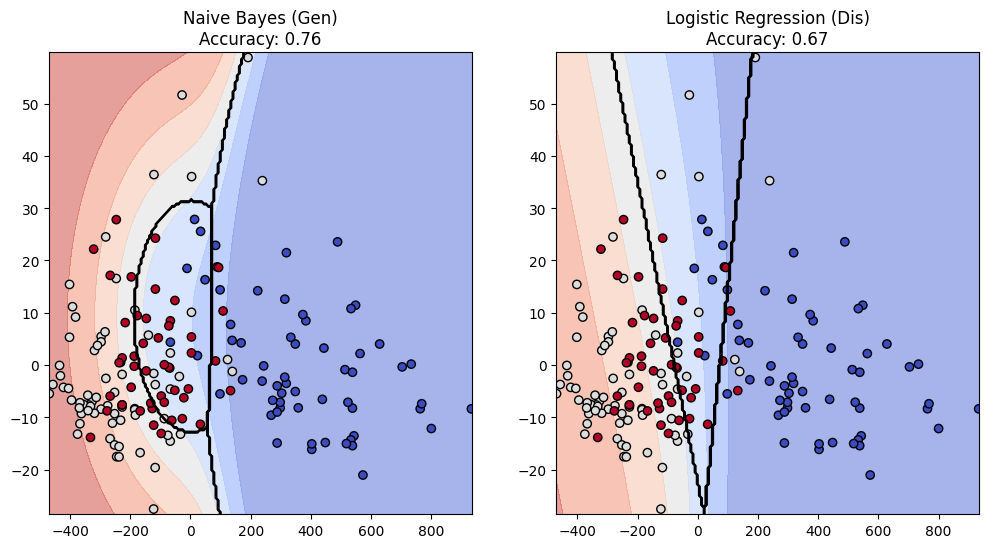

In [ ]:
ypred_nb = nb.predict(xtest)
ypred_lr = lr.predict(xtest)
acc_nb = accuracy_score(ytest, ypred_nb)
acc_lr = accuracy_score(ytest, ypred_lr)

fig, axes = plt.subplots(1,2, figsize = (12,6))
plot_db(nb, x_new, y, axes[0], "Naive Bayes (Gen)", acc_nb)
plot_db(lr, x_new, y, axes[1], "Logistic Regression (Dis)", acc_lr)
plt.show()

### Prac 8 - Genetic Algo

In [ ]:
!pip install pygad
import pygad
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
data = load_iris()
x,y = data.data, data.target
xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state=47)

def fitness_func(ga_instance, solution, solution_idx):
  c =  solution[0]
  gamma = solution[1]
  kernel = ['linear','poly'][int(solution[2])]
  if kernel not in ['linear', 'poly']:
    return 0
  model = SVC(C = c, gamma = gamma, kernel = kernel, random_state = 42)
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  accuracy = accuracy_score(ytest, predictions)
  return accuracy

NameError: name 'train_test_split' is not defined

In [ ]:
ga_instance = pygad.GA(
    num_generations = 50,
    num_parents_mating = 5,
    fitness_func = fitness_func,
    sol_per_pop=10,
    num_genes = 3,
    gene_space = [{"low":0.1,"high":10.0},{'low':0.0001, "high":1.0}, {'low':0,'high':1,'step':1}],
    parent_selection_type = "rank",
    keep_parents = 2,
    crossover_type = "single_point",
    mutation_type = "random",
    mutation_percent_genes = 10
)

In [ ]:
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution, solution_fitness, solution_idx)

In [ ]:
c_best, gamma_best, kernel_idx = solution
print(c_best, gamma_best, kernel_idx)

In [ ]:
#Part 2
!pip install pygad
import pygad
import numpy as np
x = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

def fitness_func(ga_instance, solutions, solution_idx):
  output = np.sum(x*solutions)
  fitness = 1.0/np.abs(output-desired_output)
  return fitness

ga = pygad.GA(
    fitness_func = fitness_func,
    num_generations = 50,
    mutation_type = "random",
    num_parents_mating = 4,
    sol_per_pop=8,
    num_genes = len(x),
    init_range_high = 5,
    init_range_low=-2,
    parent_selection_type="sss",
    crossover_type = "single_point",
    keep_parents = 3
)

In [ ]:
ga.run()
solution, solution_fitness, solution_idx = ga.best_solution()
solution

array([ 4.50474825,  2.47435712,  3.56574792, -2.04626877, -2.57690224,
       -0.07272851])

In [ ]:
solution_fitness

np.float64(147.0325238203576)

### Prac 9 - Collab filtering

In [ ]:
#collaborative filtering
ratings = pd.read_csv("ratings.csv")
books = pd.read_csv("books")
df = pd.merge(ratings, books, on = "ISBN")
df.shape
df = df.pivot_table(index = 'Book_title', columns = 'User_ID', values = "Ratings").fillna(0)


In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors = 7, n_jobs = -1)
nn.fit(df)

indices = nn.kneighbors(df.loc[["Book name"]], 10)
for index, title in enumerate(df.index[indices[0]]):
  print((index+1),".",title)


### Prac 10 - Content filtering

In [ ]:
#Movie recommender - Cosine similarity, Content based
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("movies.csv")
selected_features = ["genres",'titles','cast','director','keywords','original_language']
df = df[selected_features].fillna("")

In [ ]:
def combine_row(row):
  return row['title'] + ", " + row['genres'] + ", " + row['cast'] + ", " + row['director'] + ", " + row['keywords'] + ", " + row['original_language']

df['combine_features'] = df.apply(combine_row, axis = 1)
tfidf = TfidfVectorizer()
tf = tfidf.fit_transform(df)
tf.toarray()

cm = cosine_similarity(tf)

In [ ]:
def get_index(title):
  return df.loc[df['title'] == title].index[0]
title = input("Enter a movie")
ui = get_index(title)

In [ ]:
sm = list(enumerate(cm[ui]))
sm = sorted(sm, key = lambda x:x[1], reverse = True)
sm

In [ ]:
#Function to get the details of the movie recommended
def get_info(index):
  return df[df.index == ui]['title'].values[0] + ": "+ df[df.index == ui]['cast'].values[0]

i = 0
for movie in sm:
  if i==0:
    i = i+1
    continue
  print(get_info(movie[0]))
  i = i+1
  if i>10:
    break

### Gen and Disc Classifier

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

In [14]:
wine = load_wine()
x,y = wine.data, wine.target

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25)
nb = GaussianNB()
nb.fit(xtrain, ytrain)
accuracy_score(nb.predict(xtest), ytest)

0.9777777777777777

In [16]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
accuracy_score(lr.predict(xtest), ytest)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9555555555555556

In [36]:
def plot_db(model, x, y, ax, title, acc):
  xmin, xmax = x[:, 0].min()-1, x[:,0].max()+1
  ymin, ymax = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))

  #Prob dist
  z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
  z = z.reshape(xx.shape)

  #Get countour
  ax.contourf(xx,yy,z, cmap = plt.cm.coolwarm, alpha = 0.5)

  #Boundary
  boundary = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contour(xx,yy,boundary, colors = "k")

  #Get scatter
  ax.scatter(x[:, 0], x[:, 1], c = y)
  ax.set_title(f"{title} \nAccuracy: {acc}")

In [37]:
pca =PCA(n_components = 2)
xnew = pca.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(xnew, y, test_size = 0.25, random_state = 47)

In [38]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
nb_acc = accuracy_score(ypred, ytest)

lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
lr_acc = accuracy_score(ypred, ytest)

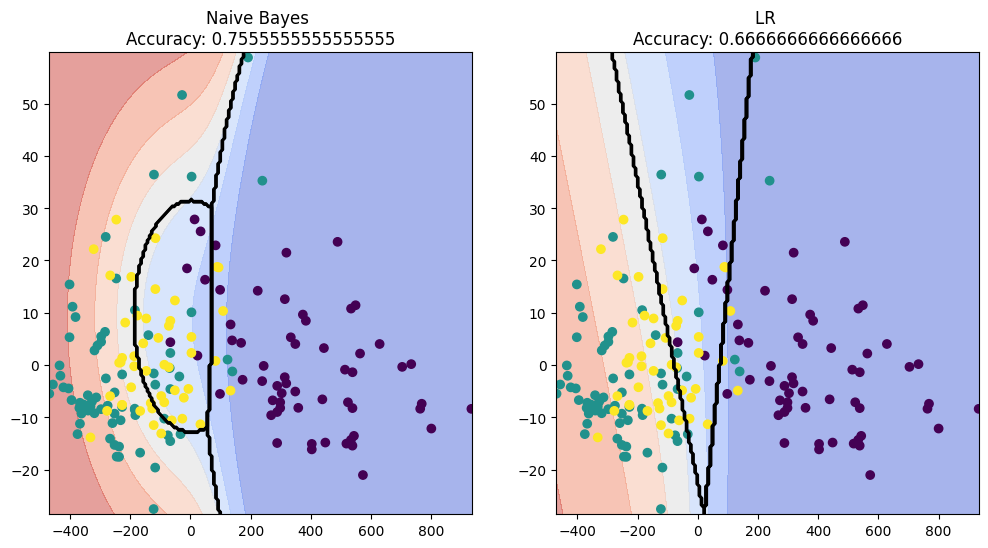

In [39]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
plot_db(nb, xnew, y, axes[0], "Naive Bayes",nb_acc)
plot_db(lr, xnew, y, axes[1], "LR", lr_acc)
plt.show()

### Gen Algo Practice


In [46]:
!pip install pygad
import pygad
import numpy as np

X = [2,10,4,3,20]
des_output = 44

def fitness_func(ga_instance, solutions, solution_idx):
  op = np.sum(X*solutions)
  fitness = 1/np.abs(op - des_output + 1e-6)
  return fitness

ga_instance = pygad.GA(
    fitness_func = fitness_func,
    num_generations = 50,
    num_parents_mating = 4,
    sol_per_pop = 8,
    parent_selection_type = "sss",
    crossover_type = "single_point",
    mutation_type = "random",
    init_range_high = 10,
    init_range_low = -10,
    num_genes = len(X),
    keep_parents = 2,
    mutation_percent_genes = 10
)
ga_instance.run()
solution, fitness, solution_idx = ga_instance.best_solution()

In [47]:
print(solution, fitness)

[-5.93798822  6.13570124 -1.26813015 -1.4419286   0.19874811] 17.333170610555925


In [51]:
#STacking
from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from numpy import mean

x,y = make_regression(n_features = 20, n_samples = 200, random_state = 47)

def stacking():
  level0 = list()
  level0.append(('dt', DecisionTreeRegressor()))
  level0.append(('knr', KNeighborsRegressor()))
  level0.append(('svr', SVR()))
  level1 = LinearRegression()
  return StackingRegressor(estimators = level0, final_estimator = level1)

def get_models():
  models = dict()
  models['knr'] = KNeighborsRegressor()
  models['dt'] = DecisionTreeRegressor()
  models['svr'] = SVR()
  models['Stacking'] = stacking()
  return models

def evaluate_models(model, x, y):
  cv = RepeatedKFold(n_splits = 10, n_repeats = 3)
  return cross_val_score(model, x, y, cv = cv, scoring = 'neg_mean_absolute_error')

models = get_models()
results, names = [], []

for name, model in models.items():
  names.append(name)
  score = evaluate_models(model, x, y)
  results.append(score)
  print(f"{name}: {mean(score)}")

knr: -102.59504921852593
dt: -130.9013068681405
svr: -141.75295663145832
Stacking: -92.59650993382768


In [59]:
#Content Based filtering
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("movies1 - movies1.csv", encoding = 'latin')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [60]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [67]:
features = ['genres','keywords',
       'original_title', 'popularity',
       'cast', 'director']
df = df[features]
df.columns, df.info(), df.popularity.astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          4775 non-null   object 
 1   keywords        4391 non-null   object 
 2   original_title  4803 non-null   object 
 3   popularity      4803 non-null   float64
 4   cast            4760 non-null   object 
 5   director        4773 non-null   object 
dtypes: float64(1), object(5)
memory usage: 225.3+ KB


(Index(['genres', 'keywords', 'original_title', 'popularity', 'cast',
        'director'],
       dtype='object'),
 None,
 0       150.437577
 1       139.082615
 2       107.376788
 3        112.31295
 4        43.926995
            ...    
 4798     14.269792
 4799      0.642552
 4800      1.444476
 4801      0.857008
 4802      1.929883
 Name: popularity, Length: 4803, dtype: object)

In [69]:
def combine_features(row):
  return str(row['genres'])+", "+ str(row['keywords'])+", "+ str(row['original_title'])+", "+ str(row['popularity'])+", "+ str(row['cast'])+", "+str(row['director'])

df['combine_features'] = df.apply(combine_features, axis = 1)
df['combine_features'].head()

,combine_features
0,"Action Adventure Fantasy Science Fiction, cult..."
1,"Adventure Fantasy Action, ocean drug abuse exo..."
2,"Action Adventure Crime, spy based on novel sec..."
3,"Action Crime Drama Thriller, dc comics crime f..."
4,"Action Adventure Science Fiction, based on nov..."


In [71]:
tfidf = TfidfVectorizer()
text = tfidf.fit_transform(df['combine_features'])
text.toarray()
text.shape

(4803, 22615)

In [73]:
cm = cosine_similarity(text)
title = input("Enter a movie title")
ui = df.loc[df['original_title'] == title].index[0]

sm = list(enumerate(cm[ui]))

Enter a movie titleAvatar


In [77]:
s2 = sorted(sm, key = lambda x:x[1], reverse = True)
i=0
for i in range(1,7):
  movie_index = s2[i][0]
  title = df.loc[movie_index, 'original_title']
  similarity = s2[i][1]
  print(f"{title}:{np.round(similarity,2)}")

Guardians of the Galaxy:0.22
Aliens:0.21
Alien:0.2
Galaxy Quest:0.17
Star Trek Into Darkness:0.17
Star Trek Beyond:0.17


### Collab filtering

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [4]:
ratings = pd.read_csv("/content/BX-Book-Ratings - BX-Book-Ratings.csv")
books = pd.read_csv("/content/BX-Books - BX-Books.csv")
ratings.head(2), books.head(2)

(   User-ID        ISBN  Book-Rating
 0   276725  034545104X            0
 1   276726   155061224            5,
         ISBN           Book-Title           Book-Author  Year-Of-Publication  \
 0  195153448  Classical Mythology    Mark P. O. Morford                 2002   
 1    2005018         Clara Callan  Richard Bruce Wright                 2001   
 
                  Publisher                                        Image-URL-S  \
 0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
 1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
 
                                          Image-URL-M  \
 0  http://images.amazon.com/images/P/0195153448.0...   
 1  http://images.amazon.com/images/P/0002005018.0...   
 
                                          Image-URL-L  Unnamed: 8  Unnamed: 9  \
 0  http://images.amazon.com/images/P/0195153448.0...         NaN         NaN   
 1  http://images.amazon.com/images/P/0002005018.0...       

In [5]:
ratings.columns, books.columns

(Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object'),
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
        'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Unnamed: 8', 'Unnamed: 9',
        'Unnamed: 10'],
       dtype='object'))

In [6]:
df = pd.merge(ratings, books, on = "ISBN", how = "inner")
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [16]:
df2 = df.sample(frac = 0.1, random_state = 47)

In [17]:
pivot = df2.pivot_table(index='Book-Title', columns = 'User-ID',values='Book-Rating').fillna(0)
pivot.head()

User-ID,8,9,16,22,36,53,75,86,87,92,...,278535,278541,278550,278582,278586,278672,278755,278771,278773,278781
Book-Title,,,,,,,,,,,,,,,,,,,,,
01-01-00: A Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13 99 Euros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
nn = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors = 7, n_jobs = -1)
nn.fit(pivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=7)

In [22]:
indices = nn.kneighbors(pivot.loc[["14,000 Things to Be Happy About"]], 10, return_distance= False)
indices

array([[ 790,    2, 1215, 1214, 1213, 1212, 1211, 1210, 1209, 1208]])

In [23]:
for index, title in enumerate(pivot.index[indices[0]]):
  print(f"{index+1}. {title}")

1. Superior Women
2. 14,000 Things to Be Happy About
3. Wouldn't Take Nothing for My Journey Now
4. World of Pies : A Novel
5. Wolf Moon
6. Wizard at Large (Rookies Series)
7. Without Remorse
8. With Heart
9. Witchcraft
10. Wish You Well
